In [5]:
import pandas as pd

# Load the coffee shop data
df_coffee = pd.read_csv('C:/Users/user/Desktop/Coffee_Shop_Sales.xlsx')


# Load the weather data
df_weather = pd.read_csv('C:/Users/user/Desktop/new york_2023-01-01_2023-06-30.csv')

# Show the first few rows of the coffee sales data
df_coffee.head()


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
df_weather.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,new york,2023-01-01T00:00:00,12.2,12.2,11.0,92.56,0.185,100,rain,0.0,...,1007.1,100.0,11.3,227.0,0.8,0,NaN,"Rain, Overcast",rain,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
1,new york,2023-01-01T01:00:00,11.7,11.7,10.5,92.32,0.028,100,rain,0.0,...,1007.2,100.0,10.6,228.0,0.8,0,NaN,"Rain, Overcast",rain,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
2,new york,2023-01-01T02:00:00,11.7,11.7,9.9,88.94,0.094,100,rain,0.0,...,1006.9,51.8,11.6,227.0,0.8,0,NaN,"Rain, Partially cloudy",rain,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
3,new york,2023-01-01T03:00:00,11.1,11.1,9.6,90.38,0.000,0,NaN,0.0,...,1007.8,25.4,13.2,224.0,0.8,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."
4,new york,2023-01-01T04:00:00,11.4,11.4,9.0,85.38,0.000,0,NaN,0.0,...,1008.1,20.3,14.7,222.0,0.8,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,KEWR,KLGA,72502014734,D2180,KNYC,7..."


In [7]:
print(df_coffee.columns)

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail'],
      dtype='object')


In [8]:
#in coffee shop data : store_location, store_id, transaction_id and unit_price columns for category prediction and undertsand 
#the relation between weather and category are useless, now lets drop them:
df_coffee.drop(['store_location', 'store_id','transaction_id','unit_price'], axis=1, inplace=True)
print(df_coffee.columns)

Index(['transaction_date', 'transaction_time', 'transaction_qty', 'product_id',
       'product_category', 'product_type', 'product_detail'],
      dtype='object')


In [9]:
print(df_weather.columns)

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')


In [10]:
#in weather data : name, winddir, sealevelpressure, severerisk, stations and uvindex columns for category prediction and undertsand 
#the relation between weather and category are useless, now lets drop them:
df_weather.drop(['name', 'winddir','sealevelpressure','severerisk', 'stations', 'uvindex' ], axis=1, inplace=True)
print(df_weather.columns)

Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'conditions', 'icon'],
      dtype='object')


In [11]:
# now lets combine them base on hours in same day:(with help of ChatGpt)

# Combine and convert date + time columns in df_coffee
df_coffee['transaction_datetime'] = pd.to_datetime(df_coffee['transaction_date'].astype(str) + ' ' + df_coffee['transaction_time'].astype(str))

# Extract the hour (rounded down) from datetime
df_coffee['hour'] = df_coffee['transaction_datetime'].dt.floor('H')

# Convert weather datetime and extract hour
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['hour'] = df_weather['datetime'].dt.floor('H')

# Merge on hour
df_main = pd.merge(df_coffee, df_weather, on='hour', how='left')

# (drop duplicate datetime columns)
df_main.drop(columns=['datetime', 'transaction_datetime', 'transaction_date', 'transaction_time' ], inplace=True)

df_main.head()

C:\Users\user\AppData\Local\Temp\ipykernel_20412\3693874443.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_coffee['hour'] = df_coffee['transaction_datetime'].dt.floor('H')
C:\Users\user\AppData\Local\Temp\ipykernel_20412\3693874443.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_weather['hour'] = df_weather['datetime'].dt.floor('H')


,transaction_qty,product_id,product_category,product_type,product_detail,hour,temp,feelslike,dew,humidity,...,snow,snowdepth,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,conditions,icon
0,2,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
1,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
2,2,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
3,1,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night
4,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,0.0,0.0,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night


In [12]:
print(df_main.columns)

Index(['transaction_qty', 'product_id', 'product_category', 'product_type',
       'product_detail', 'hour', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'conditions', 'icon'],
      dtype='object')


In [13]:
# Let's add new columns
df_main['humidity_prec_percentage'] = (df_main['humidity'] + df_main['precipprob']) / 2

df_main['cloud_rain_percentage'] = (df_main['cloudcover'] + df_main['precipprob']) / 2


print(df_main.columns)

Index(['transaction_qty', 'product_id', 'product_category', 'product_type',
       'product_detail', 'hour', 'temp', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'conditions', 'icon', 'humidity_prec_percentage',
       'cloud_rain_percentage'],
      dtype='object')


In [14]:
df_main.head()

,transaction_qty,product_id,product_category,product_type,product_detail,hour,temp,feelslike,dew,humidity,...,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,conditions,icon,humidity_prec_percentage,cloud_rain_percentage
0,2,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
1,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
2,2,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
3,1,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6
4,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:00:00,10.5,10.5,7.7,82.98,...,23.8,10.3,19.2,15.5,1.0,0.0,Clear,clear-night,41.49,9.6


In [15]:
# find NaN values in my data
missing_values = df_main.isnull().sum()
print(missing_values[missing_values > 0])  # Shows only columns with NaNs


preciptype    136969
dtype: int64


In [16]:
# as we see preciptype has NaNs which is not good for our dataset, NaNs in this column mean nothing happend (no rain or snow for example) so we
# can write "None" instead of NaN values:
df_main['preciptype'].fillna('None', inplace=True)

# check NaN values again
missing_values = df_main.isnull().sum()
print(missing_values[missing_values > 0])  # Shows only columns with NaNs

Series([], dtype: int64)


C:\Users\user\AppData\Local\Temp\ipykernel_20412\3762776314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['preciptype'].fillna('None', inplace=True)


In [17]:
# Structure of the data
print(df_main.shape)
print(df_main.dtypes)

# Summary statistics for numeric columns
df_main.describe()


(149116, 25)
transaction_qty                      int64
product_id                           int64
product_category                    object
product_type                        object
product_detail                      object
hour                        datetime64[ns]
temp                               float64
feelslike                          float64
dew                                float64
humidity                           float64
precip                             float64
precipprob                           int64
preciptype                          object
snow                               float64
snowdepth                          float64
windgust                           float64
windspeed                          float64
cloudcover                         float64
visibility                         float64
solarradiation                     float64
solarenergy                        float64
conditions                          object
icon                                objec

,transaction_qty,product_id,hour,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,cloudcover,visibility,solarradiation,solarenergy,humidity_prec_percentage,cloud_rain_percentage
count,149116.000000,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,1.438276,47.918607,2023-04-15 23:34:41.016121344,13.775689,12.837733,3.827430,54.526482,0.082351,7.950186,0.001105,0.049695,26.243543,11.897780,53.879883,14.443948,304.185543,1.095023,31.238334,30.915035
min,1.000000,1.000000,2023-01-01 07:00:00,-15.400000,-24.800000,-25.300000,11.680000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.900000,0.000000,0.000000,5.840000,0.000000
25%,1.000000,33.000000,2023-03-06 13:00:00,7.500000,5.700000,-2.200000,39.200000,0.000000,0.000000,0.000000,0.000000,18.000000,7.400000,19.200000,16.000000,67.000000,0.200000,19.660000,9.600000
50%,1.000000,47.000000,2023-04-24 08:00:00,13.800000,13.800000,4.000000,52.230000,0.000000,0.000000,0.000000,0.000000,25.200000,11.300000,38.400000,16.000000,210.000000,0.800000,26.185000,19.200000
75%,2.000000,60.000000,2023-05-30 07:00:00,20.000000,20.000000,10.300000,68.850000,0.000000,0.000000,0.000000,0.000000,33.500000,15.700000,95.700000,16.000000,504.000000,1.800000,34.600000,47.850000
max,8.000000,87.000000,2023-06-30 20:00:00,32.100000,30.900000,22.000000,96.820000,15.904000,100.000000,0.900000,5.500000,67.700000,41.400000,100.000000,24.600000,1022.000000,3.700000,98.360000,100.000000
std,0.542509,17.930020,NaN,7.770955,9.003873,8.396553,19.587111,0.563361,27.052136,0.020810,0.349125,10.707424,6.365012,36.207604,3.446665,274.195984,0.987285,19.899101,26.022786


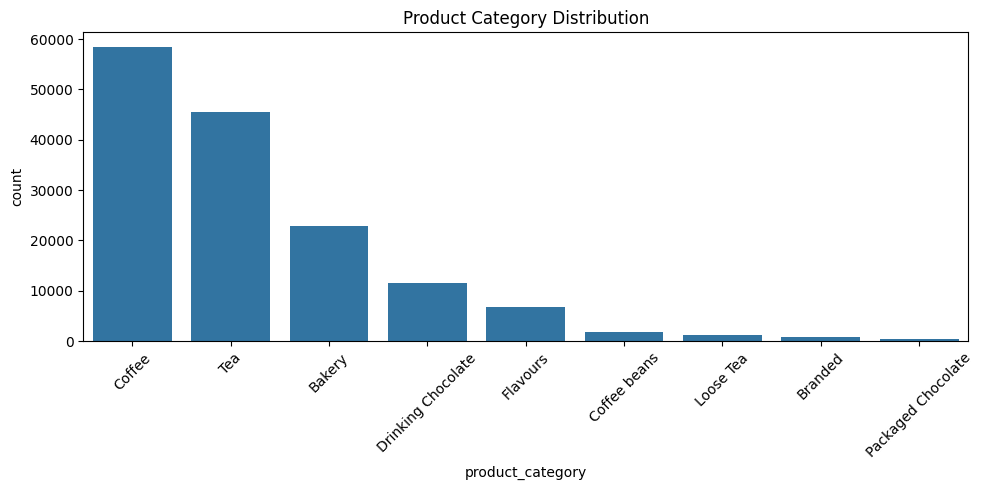

In [18]:
# which types of products are most popular(How often each product category appears in our dataset)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df_main, x='product_category', order=df_main['product_category'].value_counts().index)
plt.title("Product Category Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


product_type
Brewed Chai tea          26250
Gourmet brewed coffee    25973
Barista Espresso         24943
Brewed Black tea         17462
Hot chocolate            17457
Brewed herbal tea        17328
Organic brewed coffee    13012
Drip coffee              12891
Premium brewed coffee    12431
Scone                    10465
Name: transaction_qty, dtype: int64


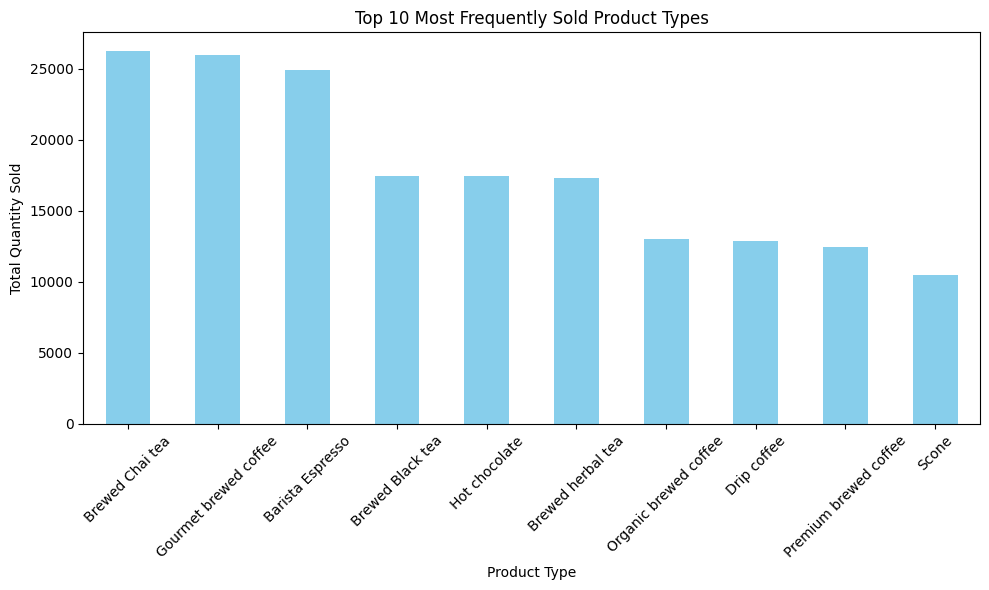

In [19]:
# Group by product_type and sum the quantities sold
top_product_types = df_main.groupby('product_type')['transaction_qty'].sum().sort_values(ascending=False)

# Display top 10 most sold product types
print(top_product_types.head(10))

# Optional: visualize
top_product_types.head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Most Frequently Sold Product Types')
plt.xlabel('Product Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


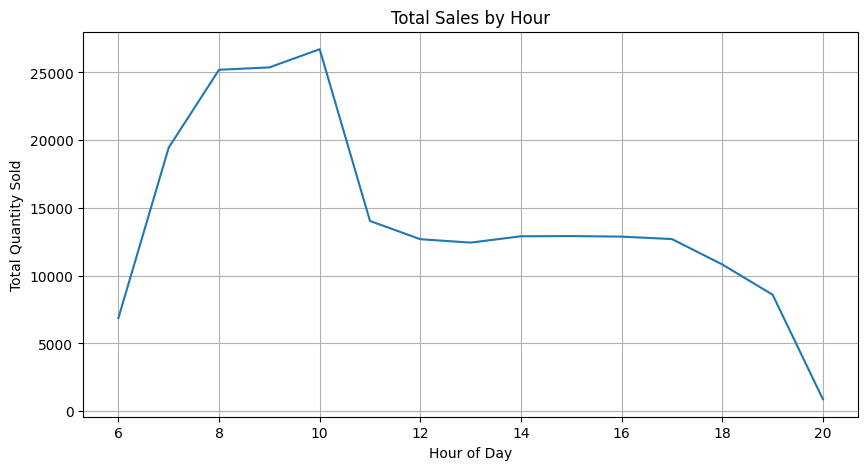

In [20]:
# Find peak sales times by hour

df_main['hour_only'] = df_main['hour'].dt.hour


hourly_sales = df_main.groupby('hour_only')['transaction_qty'].sum()

# Plotting sales by hour
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title("Total Sales by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Quantity Sold")
plt.grid()
plt.show()

# drop extra added columns
df_main.drop(['hour_only'], axis=1, inplace=True)

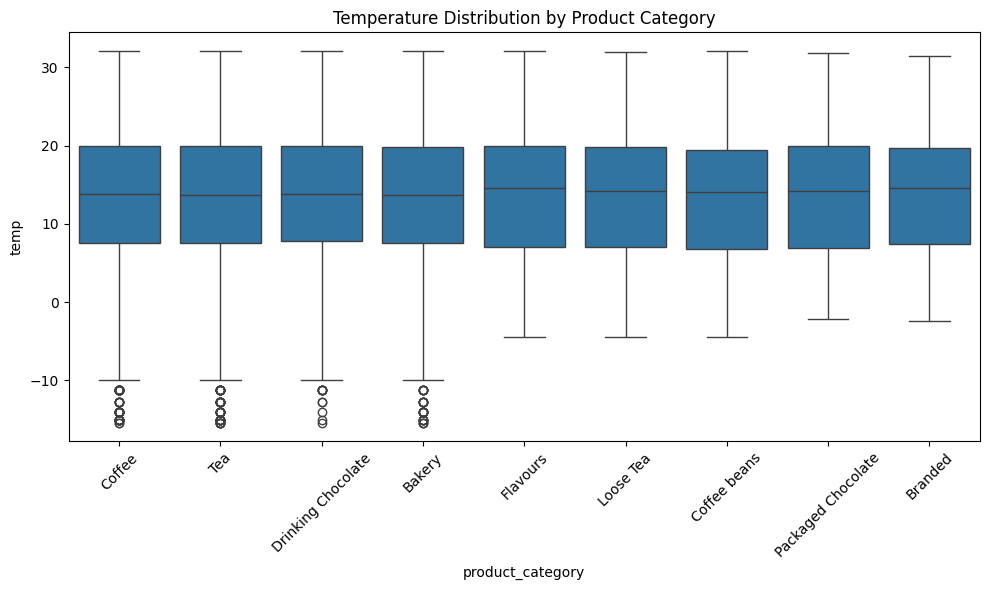

In [21]:
# Temperature vs. Category
plt.figure(figsize=(10,6))
sns.boxplot(data=df_main, x='product_category', y='temp')
plt.title("Temperature Distribution by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


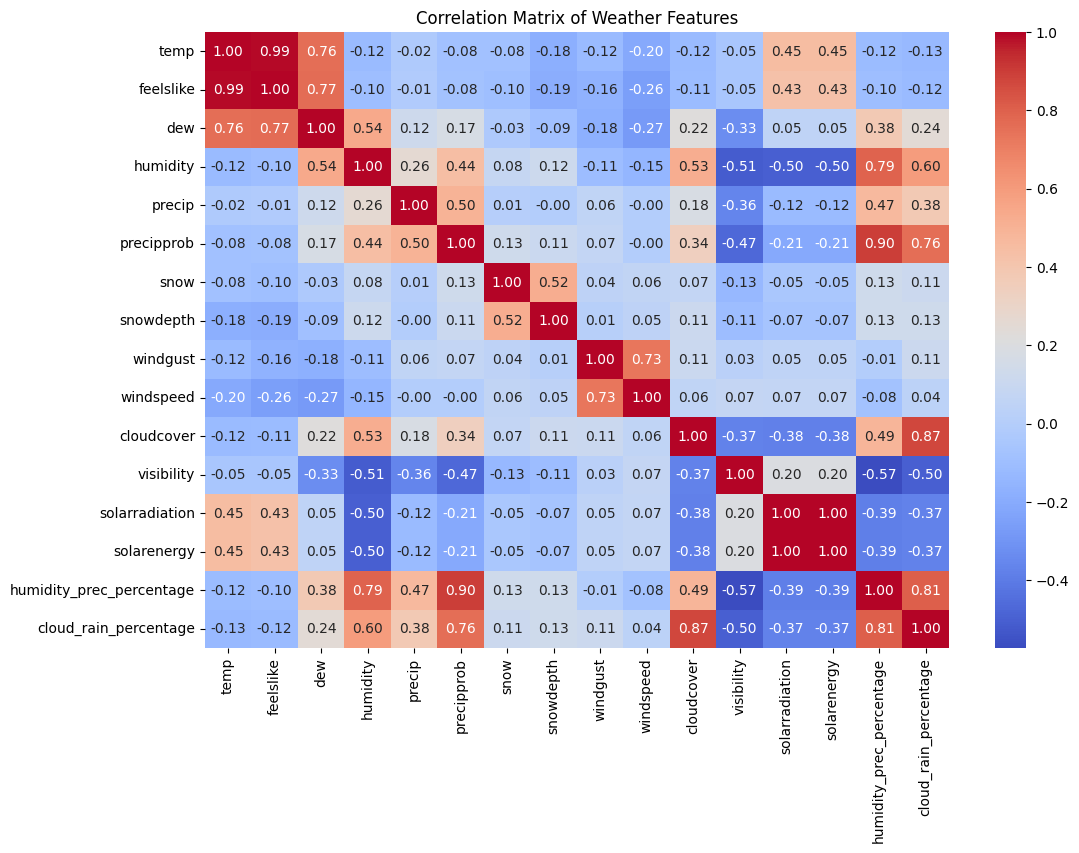

In [22]:
# Correlation Matrix of Weather Features
weather_cols = ['temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                   'snow', 'snowdepth', 'windgust', 'windspeed', 'cloudcover', 
                   'visibility', 'solarradiation', 'solarenergy', 'humidity_prec_percentage',
                   'cloud_rain_percentage']


plt.figure(figsize=(12, 8))
sns.heatmap(df_main[weather_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Weather Features")
plt.show()


<Axes: xlabel='temp', ylabel='Count'>

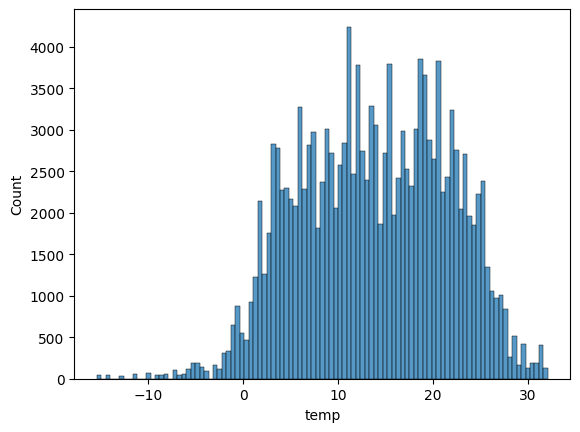

In [23]:
sns.histplot(df_main['temp'])

<Axes: xlabel='feelslike', ylabel='Count'>

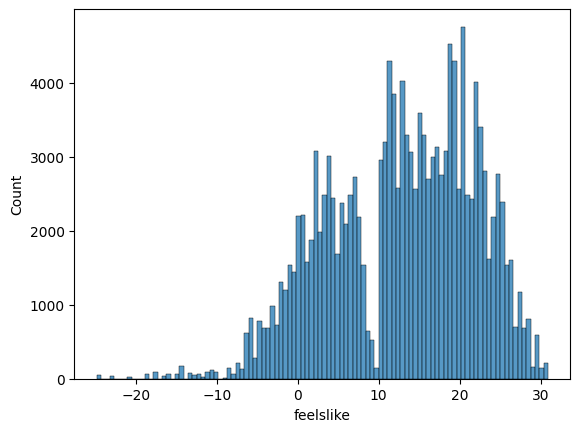

In [24]:
sns.histplot(df_main['feelslike'])

In [25]:
#Null Hypothesis (H0): The means of weather variables are the same across all product categories -> weather does not affect product_category.

#Alternative Hypothesis (H1): At least one weather variable’s mean differs across product categories -> weather does affect product_category.

# now lets use ANOVA test to check if weather parameters affect our product category selling or not:(with help of ChatGpt)

from scipy.stats import f_oneway

# List of weather-related numerical columns
weather_columns = ['temp', 'feelslike', 'dew', 'humidity', 'precip',
                   'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed',
                   'cloudcover', 'visibility', 'solarradiation', 'solarenergy',
                   'humidity_prec_percentage', 'cloud_rain_percentage']

# Store results
anova_results = {}

# Loop over each weather variable
for col in weather_columns:
    groups = [group[col].dropna() for name, group in df_main.groupby('product_category')]
    
    # Perform one-way ANOVA
    if len(groups) >= 2:
        F, p = f_oneway(*groups)
        anova_results[col] = {'F': round(F, 2), 'p': round(p, 4)}

# Convert to DataFrame for readability
anova_df = pd.DataFrame(anova_results).T.sort_values(by='p')

# Display
print(anova_df)




                              F       p
snowdepth                 14.30  0.0000
precipprob                 5.18  0.0000
cloud_rain_percentage     11.65  0.0000
cloudcover                11.39  0.0000
solarradiation             7.59  0.0000
solarenergy                7.62  0.0000
visibility                 4.02  0.0001
humidity_prec_percentage   3.41  0.0006
precip                     3.00  0.0023
windgust                   2.31  0.0179
temp                       2.16  0.0270
feelslike                  2.08  0.0338
humidity                   2.01  0.0407
snow                       1.70  0.0919
dew                        1.34  0.2182
windspeed                  1.29  0.2409


In [ ]:
# As we can see from the ANOVA results:
# The following weather variables have p-values less than 0.05, which means we reject the null hypothesis for them:
# snowdepth, precipprob, cloud_rain_percentage, cloudcover, solarradiation, solarenergy,
# visibility, humidity_prec_percentage, precip, windgust, temp, feelslike, and humidity.
# These variables significantly affect the product selling category.
# On the other hand, snow, dew, and windspeed have p-values greater than 0.05,
# so we fail to reject the null hypothesis for them — meaning there's no statistically significant evidence
# that these variables affect the product category.
